In [13]:
import sys
sys.path.append("../database")
from database import DataBase
from graph import Graph
from model import Model
from autoencoder import Autoencoder as net1
import cupy as cp
from dataset import Dataset

#### DATABASE ######
path_db = '../database/database.db'
db = DataBase(path_db)
#db.db_reset()
#### EXECUTION ###
from database import DataBase
id_execution = 64



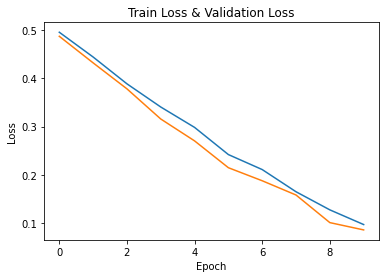

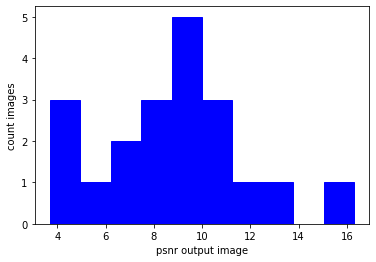

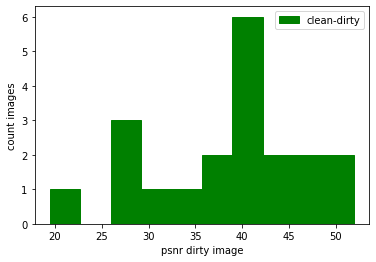

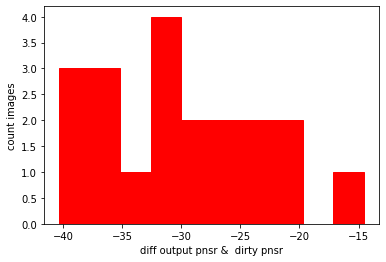

id_execution :64
id_model :67
size_figure :28
type_psf :psf_gauss_28x28
num_epochs :10
learning_rate :0.001
start :0
stop :100
len_device :2
perc_train :0.7
perc_validation :0.2
perc_test :0.1
batch_train :5
batch_validation :5
batch_test :1
time_train :2.100266456604004
time_test :0.14960145950317383
avg_psnr_output :38.746811866760254
std_psnr_output :2.9683642291334964
avg_psnr_dirty :38.746811866760254
std_psnr_dirty :8.21083394529246
avg_psnr_diff :38.746811866760254
std_psnr_diff :6.9063913020010315

 dataset : 
  clean/psf/dirty/mask


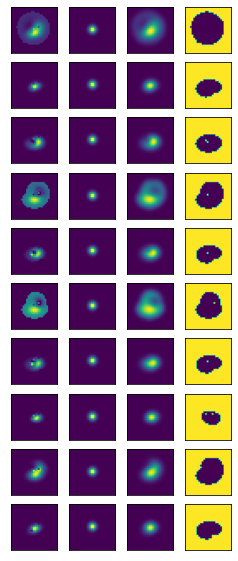

In [14]:
##### SQL EXECUTION ### 

train_loss = db.get_loss(id_execution,'train')
valid_loss =  db.get_loss(id_execution,'validation')
psnr_output = db.get_psnr(id_execution,'output')
psnr_dirty= db.get_psnr(id_execution,'dirty')
psnr_diff =db.get_psnr(id_execution,'diff')

Graph.train_validation_loss_epoch(train_loss,valid_loss)
Graph.psnr_graph(psnr_output,psnr_dirty,psnr_diff) 

id_execution,id_model,size_figure,type_psf,num_epochs,learning_rate ,start,stop,len_device,perc_train,perc_validation,perc_test ,batch_train,batch_validation,batch_test, time_train ,time_test,avg_psnr_output,std_psnr_output,avg_psnr_dirty ,std_psnr_dirty ,avg_psnr_diff ,std_psnr_diff = db.get_execution(id_execution)
print('id_execution :'+str(id_execution))
print('id_model :'+str(id_model))
print('size_figure :'+str(size_figure))
print('type_psf :'+str(type_psf))
print('num_epochs :'+str(num_epochs))
print('learning_rate :'+str(learning_rate))
print('start :'+str(start))
print('stop :'+str(stop))
print('len_device :'+str(len_device))
print('perc_train :'+str(perc_train))
print('perc_validation :'+str(perc_validation))
print('perc_test :'+str(perc_test))
print('batch_train :'+str(batch_train))
print('batch_validation :'+str(batch_validation))
print('batch_test :'+str(batch_test))
print('time_train :'+str(time_train))
print('time_test :'+str(time_test))
print('avg_psnr_output :'+str(avg_psnr_output))
print('std_psnr_output :'+str(std_psnr_output))
print('avg_psnr_dirty :'+str(avg_psnr_dirty))
print('std_psnr_dirty :'+str(std_psnr_dirty))
print('avg_psnr_diff :'+str(avg_psnr_diff))
print('std_psnr_diff :'+str(std_psnr_diff))


path_clean = '../dataset/data/images_'+str(size_figure)+'x'+str(size_figure)+'/images'
path_dirty = '../dataset/data/images_'+str(size_figure)+'x'+str(size_figure)+'/convolutions/'
path_psf = '../dataset/data/images_'+str(size_figure)+'x'+str(size_figure)+'/convolutions/'



data = Dataset(size_figure = size_figure,
            device = 0)
print('\n dataset : \n  clean/psf/dirty/mask')
data.view_path(path_psf = path_psf ,path_clean = path_clean,path_dirty =path_dirty,type_psf= type_psf,start = start,stop = 10)


PSNR AVERAGE_DIRTY: 33.386617469787595
PSNR STD_DIRTY : 33.386617469787595
PSNR AVERAGE_OUTPUT: 33.386617469787595
PSNR STD_OUTPUT : 2.0141923937880026
PSNR AVERAGE_DIFF: 33.386617469787595
PSNR STD_DIFF : 8.616901957239437


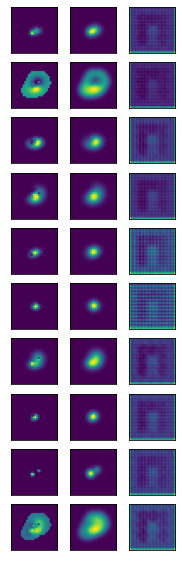

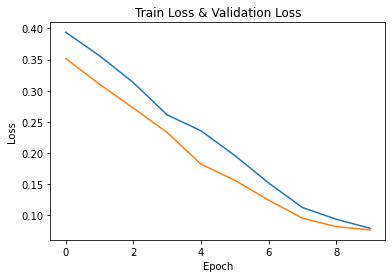

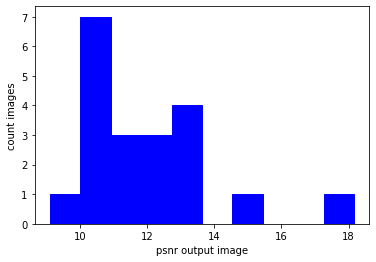

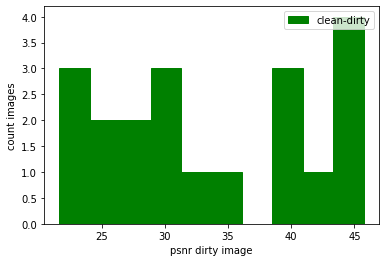

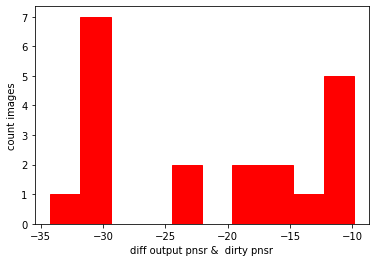

id_execution :67
id_model :67
size_figure :28
type_psf :psf_gauss_28x28
num_epochs :10
learning_rate :0.001
start :0
stop :100
len_device :2
perc_train :0.7
perc_validation :0.2
perc_test :0.1
batch_train :5
batch_validation :5
batch_test :1
time_train :1.9838688373565674
time_test :0.09124088287353516
avg_psnr_output :33.386617469787595
std_psnr_output :2.0141923937880026
avg_psnr_dirty :33.386617469787595
std_psnr_dirty :8.258235593557943
avg_psnr_diff :33.386617469787595
std_psnr_diff :8.616901957239437


In [15]:
##### SQL RUN ### 

id_execution,id_model,size_figure,type_psf,num_epochs,learning_rate ,start,stop,len_device,perc_train,perc_validation,perc_test ,batch_train,batch_validation,batch_test, time_train ,time_test,avg_psnr_output,std_psnr_output,avg_psnr_dirty ,std_psnr_dirty ,avg_psnr_diff ,std_psnr_diff = db.get_execution(id_execution)

id_execution,k1,k2,k3,k4,k5,k6,k7,k8,p1,p2,p3,p4,s1,s2,s3,s4,out_in = db.get_params(id_model)
    

len_dataset = stop - start

## GPU PARAMS ###
device_1  = 'cuda:0'
device_2  = 'cuda:1'
devices = [device_1,device_2]
###############

net = net1(size = size_figure,out_in = out_in,
               k1=k1,p1=p1,k2=k2,p2=p2,k3=k3,p3=p3,k4=k4,p4=p4,
               k5=k5,s1=s1,k6=k6,s2=s2,k7=k7,s3=s3,k8=k8,s4=s4)     
m = Model(
    size_figure = size_figure,
    type_psf = type_psf,
    num_epochs = num_epochs,
    learning_rate =  learning_rate , 
    start = start,
    stop = stop,
    devices = devices,
    perc_train =   perc_train,
    perc_validation =  perc_validation,
    perc_test  = perc_test,
    batch_train =  batch_train,
    batch_validation =  batch_validation,
    batch_test = batch_test,
    net = net
)

net,train_loss,valid_loss,time_train =m.run_train(net = net,start = 
                                                  start, stop = stop)
net,psnr_output,psnr_dirty,psnr_diff,time_test = m.run_test(net = net,start = start, stop = stop) 

avg_psnr_dirty = cp.asnumpy(cp.average(psnr_dirty)).item()
std_psnr_dirty = cp.asnumpy(cp.std(cp.array(psnr_dirty))).item()
print('PSNR AVERAGE_DIRTY: '+str(avg_psnr_dirty))
print('PSNR STD_DIRTY : '+str(avg_psnr_dirty))  
avg_psnr_output = cp.asnumpy(cp.average(psnr_dirty)).item()
std_psnr_output = cp.asnumpy(cp.std(cp.array(psnr_output))).item()
print('PSNR AVERAGE_OUTPUT: '+str(avg_psnr_output))
print('PSNR STD_OUTPUT : '+str(std_psnr_output))  
avg_psnr_diff = cp.asnumpy(cp.average(psnr_dirty)).item()
std_psnr_diff  = cp.asnumpy(cp.std(cp.array(psnr_diff))).item()
print('PSNR AVERAGE_DIFF: '+str(avg_psnr_diff))
print('PSNR STD_DIFF : '+str(std_psnr_diff))  
m.view_test(net,start,stop,10)

Graph.train_validation_loss_epoch(train_loss,valid_loss)
Graph.psnr_graph(psnr_output,psnr_dirty,psnr_diff) 

print('id_execution :'+str(id_execution))
print('id_model :'+str(id_model))
print('size_figure :'+str(size_figure))
print('type_psf :'+str(type_psf))
print('num_epochs :'+str(num_epochs))
print('learning_rate :'+str(learning_rate))
print('start :'+str(start))
print('stop :'+str(stop))
print('len_device :'+str(len_device))
print('perc_train :'+str(perc_train))
print('perc_validation :'+str(perc_validation))
print('perc_test :'+str(perc_test))
print('batch_train :'+str(batch_train))
print('batch_validation :'+str(batch_validation))
print('batch_test :'+str(batch_test))
print('time_train :'+str(time_train))
print('time_test :'+str(time_test))
print('avg_psnr_output :'+str(avg_psnr_output))
print('std_psnr_output :'+str(std_psnr_output))
print('avg_psnr_dirty :'+str(avg_psnr_dirty))
print('std_psnr_dirty :'+str(std_psnr_dirty))
print('avg_psnr_diff :'+str(avg_psnr_diff))
print('std_psnr_diff :'+str(std_psnr_diff))


In [ ]:
####  RUN ##### 


#PARAMS #####
#id_param,k1,k2,k3,k4,k5,k6,k7,k8,p1,p2,p3,p4,s1,s2,s3,s4,out_in = db.get_params_random()
k1,k2,k3,k4,k5,k6,k7,k8,p1,p2,p3,p4,s1,s2,s3,s4,out_in = (3,3,3,3,3,3,3,3,1,1,1,1,2,2,2,2,32)

##########DATASET ##### 
size_figure = 28
start = 0 
stop = 100
len_dataset = stop - start
## psf ####
type_psf_gauss = 'psf_gauss_'+str(size_figure)+'x'+str(size_figure)
type_psf_real = 'psf_real_'+str(size_figure)+'x'+str(size_figure)
type_psf =  type_psf_gauss
########################

## NET PARAMS ########
perc_train = 0.7
perc_validation = 0.2  
perc_test = 0.1
batch_test = 1
batch_train = 1
batch_validation = batch_train
epochs = 10
learning_rate = 1e-3 #,1e-4,1e-5]

def get_batch(batch_train,out_in,size_figure):
    if(size_figure == 640 and out_in == 640):
        batch_train = len(devices)*1
    elif (size_figure == 640 and out_in == 220):
        batch_train = len(devices)*2  
    elif(size_figure == 640 and out_in == 128):
        batch_train = len(devices)*6
    elif(size_figure == 640 and out_in == 64):
        batch_train = len(devices)*15 
    batch_validation = batch_train
    return batch_train,batch_validation

batch_train,batch_validation = get_batch(batch_train,out_in,size_figure)

########################

## GPU PARAMS ###
device_1  = 'cuda:0'
device_2  = 'cuda:1'
devices = [device_1,device_2]
###############

net = net1(size = size_figure,out_in = out_in,
               k1=k1,p1=p1,k2=k2,p2=p2,k3=k3,p3=p3,k4=k4,p4=p4,
               k5=k5,s1=s1,k6=k6,s2=s2,k7=k7,s3=s3,k8=k8,s4=s4)     
m = Model(
    size_figure = size_figure,
    type_psf = type_psf,
    num_epochs = epochs,
    learning_rate =  learning_rate , 
    start = start,
    stop = stop,
    devices = devices,
    perc_train =   perc_train,
    perc_validation =  perc_validation,
    perc_test  = perc_test,
    batch_train =  batch_train,
    batch_validation =  batch_validation,
    batch_test = batch_test,
    net = net
)

net,train_loss,valid_loss,time_train =m.run_train(net = net,start = 
                                                  start, stop = stop)
net,psnr_output,psnr_dirty,psnr_diff,time_test = m.run_test(net = net,start = start, stop = stop) 

avg_psnr_dirty = cp.asnumpy(cp.average(psnr_dirty)).item()
std_psnr_dirty = cp.asnumpy(cp.std(cp.array(psnr_dirty))).item()
print('PSNR AVERAGE_DIRTY: '+str(avg_psnr_dirty))
print('PSNR STD_DIRTY : '+str(avg_psnr_dirty))  
avg_psnr_output = cp.asnumpy(cp.average(psnr_dirty)).item()
std_psnr_output = cp.asnumpy(cp.std(cp.array(psnr_output))).item()
print('PSNR AVERAGE_OUTPUT: '+str(avg_psnr_output))
print('PSNR STD_OUTPUT : '+str(std_psnr_output))  
avg_psnr_diff = cp.asnumpy(cp.average(psnr_dirty)).item()
std_psnr_diff  = cp.asnumpy(cp.std(cp.array(psnr_diff))).item()
print('PSNR AVERAGE_DIFF: '+str(avg_psnr_diff))
print('PSNR STD_DIFF : '+str(std_psnr_diff))  
m.view_test(net,start,stop,10)

Graph.train_validation_loss_epoch(train_loss,valid_loss)
Graph.psnr_graph(psnr_output,psnr_dirty,psnr_diff) 